<a href="https://colab.research.google.com/github/mpedraza98/spotify_recommender/blob/main/code/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration


Before applying any algorithms, we will explore our dataset to understand what is the kind of data we will be dealing with.

We start by loading the libraries we will later on use and since we worked on google colab, we will mount our drive to read and save files


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/MATH637_Final_Project/data_with_extra_features/

/content/drive/.shortcut-targets-by-id/1_fy5IRsWcSj09qqvWnrAXjoN6kMNYJtN/MATH637_Final_Project/data_with_extra_features


In [ ]:
!ls

playlist_10k.csv     slice_2_tracks.csv   slice_43_tracks.csv
README.txt	     slice_36_tracks.csv  slice_48_tracks.csv
slice_15_tracks.csv  slice_38_tracks.csv  slice_49_tracks.csv
slice_1_tracks.csv   slice_3_tracks.csv   slice_70_tracks.csv


Let's explore our dataset to understand what kind of data we have. These were the columns previously retrieved using the spotify API

7. duration_ms - the duration of the track in milliseconds
8. pos - the position of the track in the playlist (zero-based)
9. Danceability: measure describes how suitable a track is for dancing.
10. Energy represents a perceptual measure of intensity and activity.
11. Key: the track is in. Integers map to pitches using standard Pitch Class notation.
12. Loudness: of a track in decibels(dB).
13. Mode indicates the modality(major or minor) of the song.
14. Speechiness: detects the presence of spoken words in a track
15. Acousticness: confidence measure from 0.0 to 1.0 of whether the track is acoustic.
16. Instrumentalness: predicts whether a track contains vocals or not.
17. Liveness: detects the presence of an audience in the recording.
18. Valence: measures from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
19. Tempo is in beats per minute (BPM).

In [ ]:
# Create a dictionary with the names of each relevant numerical feature (columns 7-19)
col_names = {7:'duration_ms', 8:'pos', 9:'Danceability', 10:'Energy', 11:'Key', 12:'Loudness', 13: 'Mode', 
             14:'Speechiness', 15:'Acousticness', 16:'Instrumentalness', 17:'Liveness', 18:'Valence', 19:'Tempo'}
col_ids = np.arange(7,20)

In [ ]:
# read our playlists tracks as a pandas dataframe
df = pd.read_csv('playlist_10k.csv', header = None)

In [ ]:
# explore the size of our data
df.shape

(665282, 20)

In [ ]:
# quick visualization of how our data looks like
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,23000,Safe And Sound - Cash Cash Remix,spotify:track:2eUSJKrUprpAQ83mBuQl2s,In A Tidal Wave Of Mystery,spotify:album:6mwV0Vhmxl5tXoopQWkNSm,Capital Cities,spotify:artist:4gwpcMTbLWtBUlOijbVpuu,326733,0,0.576,0.876,9,-2.678,0,0.1380,0.041800,0.000000,0.327,0.300,127.987
1,23000,D# Fat [Mix Cut],spotify:track:6bTOG667uaOZMMOAEsyP9f,A State Of Trance 2013 (Mixed by Armin van Buu...,spotify:album:6KibN1V4PjpWdf9XvGbQ5h,Armin van Buuren,spotify:artist:0SfsnGyD8FpIN4U4WCkBZ5,281813,1,0.603,0.872,6,-7.788,0,0.0498,0.000827,0.836000,0.220,0.255,131.989
2,23000,Let's Go - Original Mix,spotify:track:7eSDJazJwO9aFeLGE1NWUp,Let's Go,spotify:album:4Th0vbRYMuknTNIOnhCosC,Wahlstedt,spotify:artist:7yOWqfe8iP613Ne5SV9XPP,323906,2,0.673,0.953,8,-5.836,1,0.0484,0.000294,0.941000,0.122,0.341,128.020
3,23000,Voices - Radio Edit,spotify:track:7B8SeVApKXjN5zZPK3LiSw,Voices,spotify:album:2hbpjRctNMFLkFzYIw4ISe,dBerrie,spotify:artist:1G2VWfnzBbfcUWKryByloL,220952,3,0.476,0.924,0,-4.939,1,0.0477,0.013600,0.965000,0.411,0.308,126.026
4,23000,Red Lights,spotify:track:015IsLQFXbEm0f541N2qoX,A Town Called Paradise,spotify:album:7we1BNenehBwimeIkK0jL0,Tiësto,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,262200,4,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.121,0.548,124.989


Firt's let's see some description of our dataset

In [ ]:
df.describe()

,0,7,8,9,10,11,12,13,14,15,16,17,18,19
count,665282.000000,6.652820e+05,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000,665282.000000
mean,31252.663830,2.342980e+05,54.428817,0.569118,0.608191,5.150502,-7.307641,0.627032,0.058644,0.197526,0.020705,0.153264,0.457882,121.467991
std,18309.361858,7.250422e+04,48.271122,6.005932,6.007683,7.032105,6.987934,6.022688,6.001570,6.007923,6.003414,6.003275,6.007905,29.648809
min,9000.000000,0.000000e+00,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,11569.000000,1.982660e+05,17.000000,0.500000,0.508000,2.000000,-8.707000,0.000000,0.035600,0.021000,0.000000,0.094400,0.303000,98.981000
50%,42019.000000,2.246930e+05,40.000000,0.613000,0.675000,5.000000,-6.475000,1.000000,0.050200,0.106000,0.000003,0.126000,0.488000,120.141000
75%,49458.000000,2.587730e+05,79.000000,0.722000,0.809000,8.000000,-4.892000,1.000000,0.103000,0.365000,0.000815,0.241000,0.682000,139.995000
max,54999.000000,4.680000e+06,249.000000,0.988000,1.000000,11.000000,4.037000,1.000000,0.963000,0.996000,0.998000,1.000000,0.999000,245.933000


To start we must to clean our data from nan or faulty values. During the retrieval process there were tracks whose information was not available and they were assigned -999 to all features. We need to identify and delete those tracks

In [ ]:
#clean up the dataset from tracks with problems when retrieving information
df.drop(df[df[9]==-999].index, inplace = True)

In [ ]:
df.shape

(665258, 20)

24 faulty tracks were deleted. Aditionally, our dataset does not contain nan values

In [ ]:
df.describe()

,0,7,8,9,10,11,12,13,14,15,16,17,18,19
count,665258.000000,6.652580e+05,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000,665258.000000
mean,31252.679514,2.342979e+05,54.428465,0.605179,0.644253,5.186728,-7.271865,0.663095,0.094686,0.233573,0.056746,0.189309,0.493939,121.508413
std,18309.322316,7.250292e+04,48.270714,0.161318,0.210340,3.615882,3.654086,0.472653,0.102242,0.277003,0.187948,0.155222,0.240308,28.875423
min,9000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11569.000000,1.982660e+05,17.000000,0.500000,0.508000,2.000000,-8.706000,0.000000,0.035600,0.021000,0.000000,0.094400,0.303000,98.982000
50%,42019.000000,2.246965e+05,40.000000,0.613000,0.675000,5.000000,-6.474000,1.000000,0.050200,0.106000,0.000003,0.126000,0.488000,120.141000
75%,49458.000000,2.587730e+05,79.000000,0.722000,0.809000,8.000000,-4.892000,1.000000,0.103000,0.365000,0.000815,0.241000,0.682000,139.996000
max,54999.000000,4.680000e+06,249.000000,0.988000,1.000000,11.000000,4.037000,1.000000,0.963000,0.996000,0.998000,1.000000,0.999000,245.933000


Let's take a look at how are the relevant features distributed

In [ ]:
# let's first rename the columns
df.rename(columns = col_names, inplace = True)

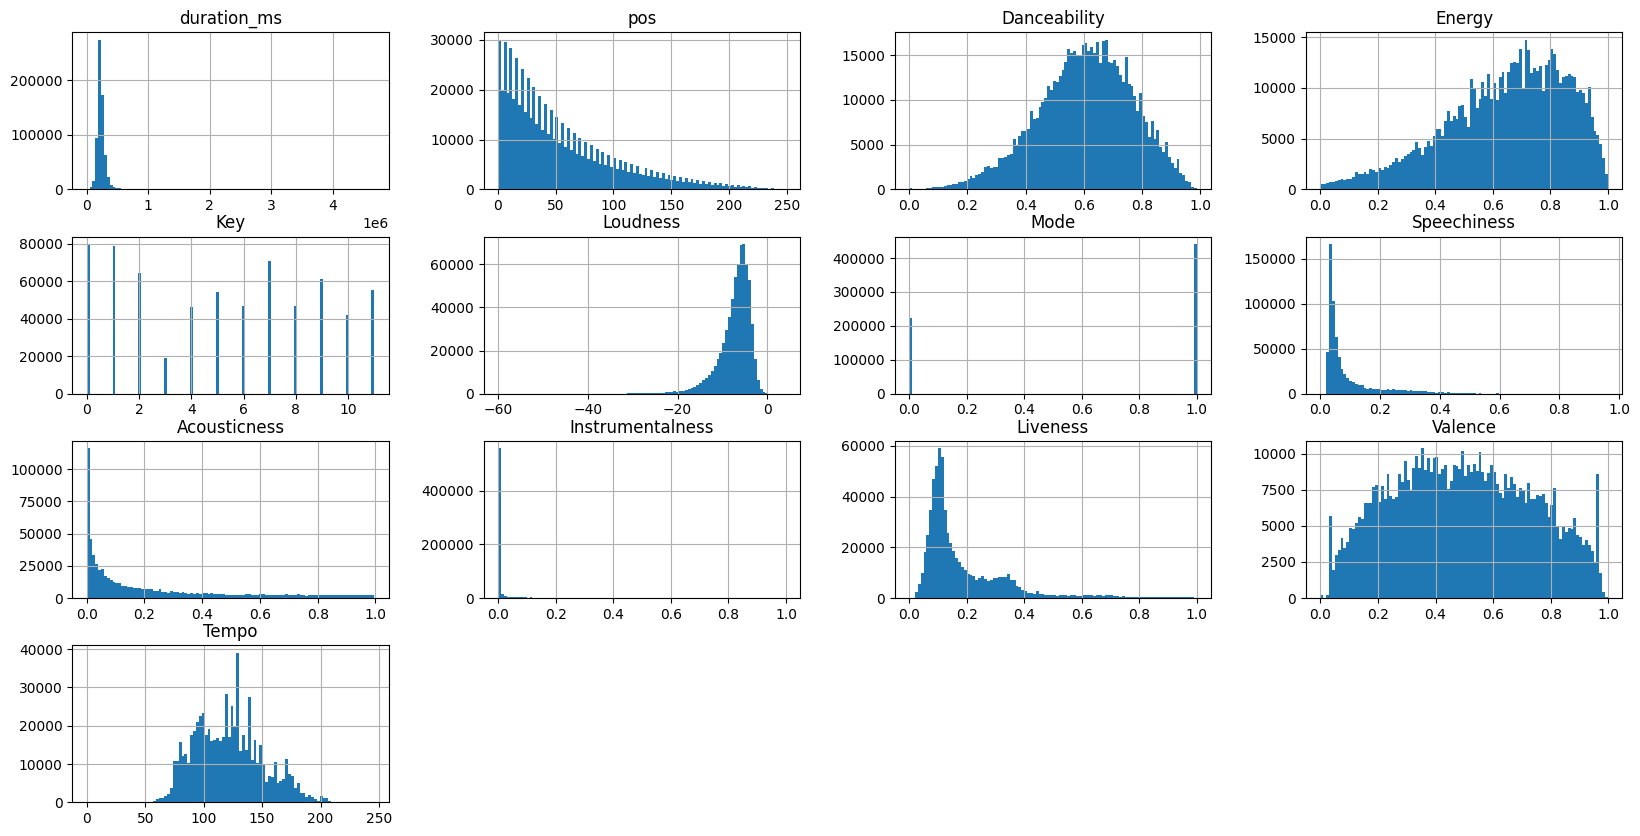

In [ ]:
df[col_names.values()].hist(bins = 100, figsize=(20,10));

For continuous variables such as Danceability and energy we see that the distribution is unimodal and it presents skewness, which might have implications if we were to detect outliers

The data spans a very wide range, we must standardize it before applying our algorithm

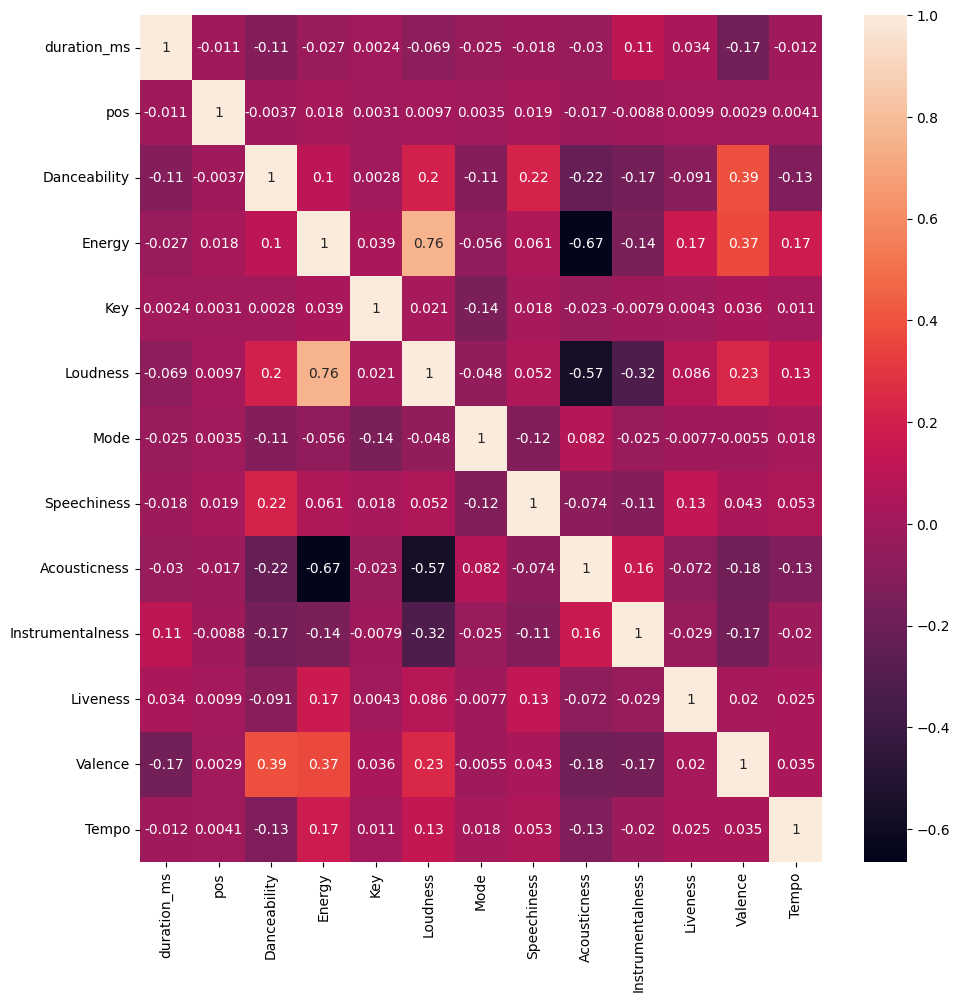

In [ ]:
plt.figure(figsize=(11,11))
ax = sns.heatmap(df[col_names.values()].corr(), annot=True)
plt.show()

When looking at the correlation plot, there is not noticeable correlation between the variables